In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
plt.style.use('default')
plt.rcParams['font.family'] = 'Times New Roman'
minimal_font_size = 15
plt.rcParams['font.size'] = minimal_font_size
axisfont = {'family': 'Times New Roman', 'weight': 'bold', 'size': 18}
tickfont = {'labelfontfamily': 'Times New Roman', 'labelsize': minimal_font_size}
legendfont = {'family': 'Times New Roman', 'weight': 'normal', 'size': minimal_font_size}

## Plot Pareto Front

In [ ]:
def get_pareto_front_indices(points):
    num_points = points.shape[0]
    is_dominated = np.zeros(num_points, dtype=bool)
    for i in range(num_points):
        for j in range(num_points):
            if i != j:
                # 一个目标最大化（第0列），另一个目标最小化（第1列）
                if (points[j][0] >= points[i][0] and points[j][1] <= points[i][1]) and \
                        (points[j][0] > points[i][0] or points[j][1] < points[i][1]):
                    is_dominated[i] = True
                    break
    return np.where(~is_dominated)[0]

def plot_pareto_front(training_record, result_dir):
    ttt = np.array(training_record["ttt"])
    ttr = np.array(training_record["ttr"])
    colors = ['#f27644', '#1f77b4', '#9467bd']  # 红、蓝、紫
    plt.scatter(179131.53562351898, 38079.6759227694, c='red', label='No control', s=60)
    plt.xlim(0.5e5, 3e5)
    plt.ylim(2e4, 7e4)
    pareto_indices = get_pareto_front_indices(np.vstack((ttr, ttt)).T)
    data = pd.DataFrame({"ttt": ttt, "ttr": ttr})
    pareto_data = data.loc[pareto_indices].sort_values("ttt")
    print("The shape of the pareto data :", pareto_data.shape)
    print(pareto_data)
    pareto_data.to_csv(f"{result_dir}/pareto_data.csv", index=False)
    pareto_points = np.vstack((ttr, ttt)).T[pareto_indices]
    pareto_points = pareto_points[np.argsort(pareto_points[:, 0])]
    plt.plot(pareto_points[:, 0], pareto_points[:, 1], c='black', marker="*",markersize=9, label='Pareto front', linewidth=1)
    plt.ylabel('Total travel time (h)', axisfont)
    plt.xlabel('Total toll revenue (¥)', axisfont)
    plt.grid(ls=':', alpha=0.3, lw=0.6, color='k')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(-3, 4), useMathText=True)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(-3, 3), useMathText=True)
    plt.legend(loc="upper left", edgecolor='k', prop=legendfont)
    plt.savefig(f"pareto_front.png", bbox_inches='tight', dpi=600)
    plt.show()

(500, 6)
The shape of the pareto data : (38, 2)
              ttt            ttf
46   23228.253207   66026.699685
45   23228.418701   66026.965522
35   23422.809620   67991.895065
63   23497.043801   75609.165329
76   24018.457704   87326.831199
36   24022.100993   97699.137354
49   25613.020577  103217.685236
80   25656.658293  122731.344503
37   25982.002312  124212.688140
120  27532.815729  135757.572313
121  28477.546726  159721.329170
422  30640.903889  168972.720177
123  31350.183709  174013.683563
126  33612.235552  181282.477156
95   33772.775895  181547.063061
142  34052.010295  182388.522375
195  34435.990796  203292.108894
97   34929.089868  206973.598325
171  35198.910853  214966.168954
172  38090.671061  228925.797467
258  40434.279941  237066.613262
373  44226.364378  257035.353636
129  45406.093113  266688.656128
446  46474.041134  274028.677910
309  48271.196288  275830.257328
74   49405.572809  277708.403118
100  50852.948294  278376.087475
432  50984.095143  279874.96

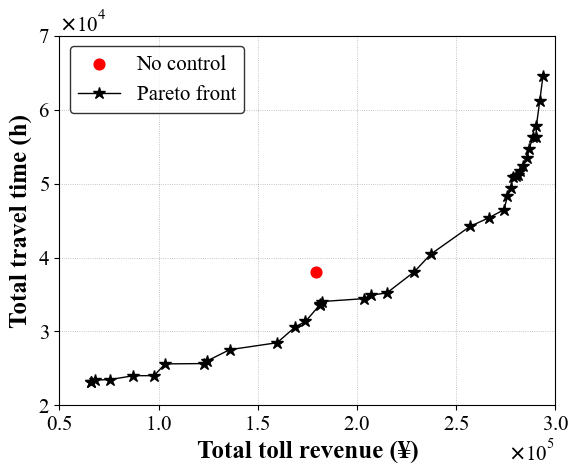

In [ ]:
result_dir = "outputs/2025-10-17 23-53-02" # todo: best result for paper. mo2
result = pd.read_csv(f"{result_dir}/stat.csv")
print(result.shape)
result["reward_toll"] = result["reward_toll"] / 1000
result["ttr"] = result["ttr"] / 1000
result["reward_speed"] = result["reward_speed"]
result["ttt"] = result["ttt"] / 3600
training_record = {
    "reward_speed": [],
    "reward_toll": [],
    "ttt": [],
    "ttr": []
}
for i in range(result.shape[0]):
    if result["reward_toll"][i]:
        training_record["reward_speed"].append(result["reward_speed"][i])
        training_record["reward_toll"].append(result["reward_toll"][i])
        training_record["ttt"].append(result["ttt"][i])
        training_record["ttr"].append(result["ttr"][i])
plot_pareto_front(training_record, result_dir)